In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_datareader as data

In [4]:
start = '2010-01-01'
end   = '2019-12-31'

df = data.DataReader('TSLA','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,85.094002,82.538002,83.671997,85.050003,40273500,85.050003
2019-12-26,86.695999,85.269997,85.582001,86.188004,53169500,86.188004
2019-12-27,87.061996,85.222000,87.000000,86.075996,49728500,86.075996
2019-12-30,85.800003,81.851997,85.758003,82.940002,62932000,82.940002
2019-12-31,84.258003,80.416000,81.000000,83.666000,51428500,83.666000


In [6]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


In [7]:
df = df.dropna(axis=0, inplace=False)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


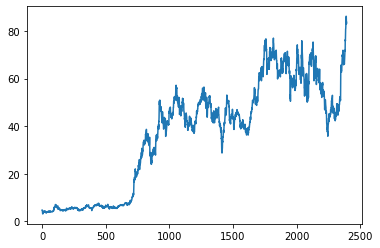

In [8]:
plt.plot(df['Close'])

In [9]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500,4.778000
1,2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500,4.766000
2,2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000,4.392000
3,2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000,3.840000
4,2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500,3.222000
...,...,...,...,...,...,...,...
2389,2019-12-24,85.094002,82.538002,83.671997,85.050003,40273500,85.050003
2390,2019-12-26,86.695999,85.269997,85.582001,86.188004,53169500,86.188004
2391,2019-12-27,87.061996,85.222000,87.000000,86.075996,49728500,86.075996
2392,2019-12-30,85.800003,81.851997,85.758003,82.940002,62932000,82.940002


In [10]:
ma100 = (df.Close).rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2389    56.71740
2390    57.12264
2391    57.52190
2392    57.88446
2393    58.24452
Name: Close, Length: 2394, dtype: float64

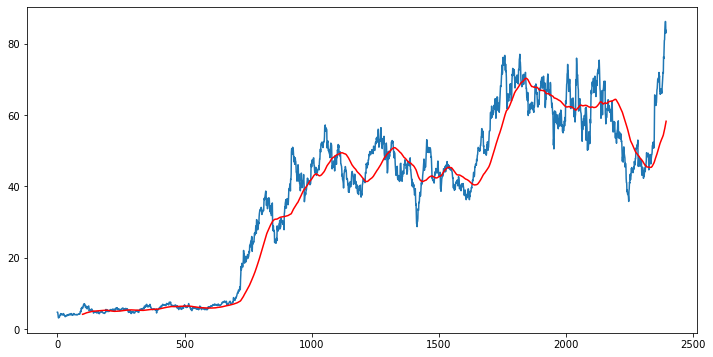

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')

In [12]:
ma200 = (df.Close).rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2389    52.43210
2390    52.57408
2391    52.71450
2392    52.85377
2393    53.00261
Name: Close, Length: 2394, dtype: float64

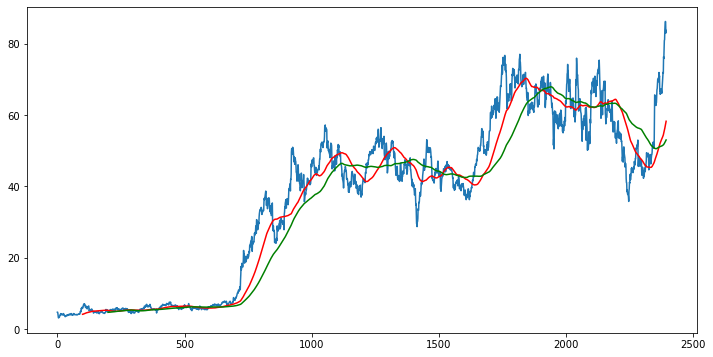

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(2394, 7)

In [15]:
# splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing  = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1675, 1)
(719, 1)


In [16]:
data_training.head()

,Close
0,4.778
1,4.766
2,4.392
3,3.840
4,3.222


In [17]:
data_testing.head()

,Close
1675,51.198002
1676,51.400002
1677,49.245998
1678,49.998001
1679,50.004002


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02993635],
       [0.02971432],
       [0.02279456],
       ...,
       [0.94889726],
       [0.96799142],
       [0.9536338 ]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)


In [21]:
x_train.shape

(1575, 100, 1)

In [22]:
# ML Model


In [23]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install tensorflow==2.8.0


Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout , LSTM
from tensorflow.keras import Sequential


In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))




model.add(LSTM(units = 120, activation = 'relu', return_sequences = True))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 120)          9

In [30]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
50/50 [==============================] - 10s 144ms/step - loss: 0.1620
Epoch 2/50
50/50 [==============================] - 7s 132ms/step - loss: 0.1268
Epoch 3/50
50/50 [==============================] - 7s 133ms/step - loss: 0.1252
Epoch 4/50
50/50 [==============================] - 7s 139ms/step - loss: 0.1244
Epoch 5/50
50/50 [==============================] - 7s 149ms/step - loss: 0.1240
Epoch 6/50
50/50 [==============================] - 7s 148ms/step - loss: 0.1220
Epoch 7/50
50/50 [==============================] - 7s 147ms/step - loss: 0.1218
Epoch 8/50
50/50 [==============================] - 7s 147ms/step - loss: 0.1214
Epoch 9/50
50/50 [==============================] - 7s 147ms/step - loss: 0.1217
Epoch 10/50
50/50 [==============================] - 8s 154ms/step - loss: 0.1207
Epoch 11/50
50/50 [==============================] - 8s 154ms/step - loss: 0.1210
Epoch 12/50
50/50 [==============================] - 8s 152ms/step - loss: 0.1205
Epoch 13/50
50/50 [=====

In [31]:
model.save('keras_model.h5')

In [32]:
data_testing.head()

,Close
1675,51.198002
1676,51.400002
1677,49.245998
1678,49.998001
1679,50.004002


In [33]:
# Now for predicting the value with the help of testing data here index is starting with 2072 now we want the previous data as
# the data is from the training data we will now append with testing data to predict the value.

In [34]:
data_training.tail(100)

,Close
1575,40.139999
1576,40.806000
1577,42.740002
1578,42.282001
1579,41.692001
...,...
1670,55.952000
1671,53.790001
1672,54.445999
1673,55.478001


In [35]:
past_100_days = data_training.tail(100)

In [36]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [37]:
final_df.head()

,Close
0,40.139999
1,40.806000
2,42.740002
3,42.282001
4,41.692001


In [38]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08624043],
       [0.0994563 ],
       [0.13783391],
       [0.12874553],
       [0.11703778],
       [0.08743108],
       [0.07000833],
       [0.0872326 ],
       [0.08385922],
       [0.08945507],
       [0.08441484],
       [0.06961144],
       [0.05949123],
       [0.07989047],
       [0.09759103],
       [0.07989047],
       [0.08381955],
       [0.09441598],
       [0.09274912],
       [0.09235232],
       [0.09937689],
       [0.08334326],
       [0.07445335],
       [0.04691039],
       [0.035917  ],
       [0.03353578],
       [0.04599755],
       [0.05651465],
       [0.06338056],
       [0.04401322],
       [0.02532049],
       [0.03806014],
       [0.00984248],
       [0.01904994],
       [0.01968489],
       [0.03845695],
       [0.02401085],
       [0.02202644],
       [0.04841851],
       [0.05623684],
       [0.07016714],
       [0.06806366],
       [0.04206855],
       [0.04139386],
       [0.01154901],
       [0.00992182],
       [0.03107516],
       [0.027

In [121]:
input_data.shape

(819, 1)

In [122]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [123]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
x_test.reshape(x_test.shape[0],x_test.shape[1])
print(x_test.shape)
print(y_test.shape)

(719, 100, 1)
(719, 100, 1)
(719,)


In [124]:
# Making Predictions

y_predicted = model.predict(x_test)

In [125]:
y_predicted.shape

(719, 100, 1)

In [126]:
y_predicted = y_predicted.reshape(y_predicted.shape[0],y_predicted.shape[2],y_predicted.shape[1])
y_predicted.shape

(719, 1, 100)

In [127]:
# y_predicted = y_predicted.transpose(2,0,1).reshape(-2,y_predicted.shape[-1])
# y_predicted.shape

In [128]:
# y_predicted = np.delete(y_predicted,99,axis=2)

In [129]:
# y_predicted = np.zeros( (719, 1, 100) )
y_predicted = y_predicted[:, :, 0]
print(y_predicted.shape)

(719, 1)


In [130]:
y_predicted.shape

(719, 1)

In [131]:
y_predicted

array([[0.42571968],
       [0.42577037],
       [0.42591798],
       [0.42588297],
       [0.42583793],
       [0.42572424],
       [0.42565888],
       [0.4257235 ],
       [0.42571056],
       [0.42573202],
       [0.4257127 ],
       [0.42565745],
       [0.4256211 ],
       [0.42569536],
       [0.42576322],
       [0.42569536],
       [0.4257104 ],
       [0.42575103],
       [0.42574465],
       [0.42574313],
       [0.42577007],
       [0.42570856],
       [0.4256749 ],
       [0.4255759 ],
       [0.425542  ],
       [0.42553514],
       [0.42557263],
       [0.4256104 ],
       [0.42563507],
       [0.42556608],
       [0.42551303],
       [0.42554814],
       [0.4254777 ],
       [0.42549726],
       [0.42549872],
       [0.4255493 ],
       [0.4255097 ],
       [0.42550468],
       [0.42558134],
       [0.4256094 ],
       [0.42565948],
       [0.4256519 ],
       [0.42555988],
       [0.4255578 ],
       [0.4254813 ],
       [0.42547786],
       [0.4255281 ],
       [0.425

In [132]:
y_test

array([0.30567134, 0.30967975, 0.26693651, 0.28185897, 0.28197804,
       0.28380364, 0.28812952, 0.28670081, 0.2763027 , 0.26947654,
       0.26165813, 0.25685596, 0.26669844, 0.31364842, 0.30463944,
       0.32972178, 0.32753897, 0.32920583, 0.2845974 , 0.30178193,
       0.30086917, 0.33412707, 0.36214625, 0.3908402 , 0.39056239,
       0.39270546, 0.39421358, 0.4744612 , 0.49501926, 0.46049131,
       0.47517563, 0.49041549, 0.52950747, 0.51490256, 0.46779377,
       0.49620983, 0.48604987, 0.48132711, 0.50224231, 0.49029642,
       0.50255978, 0.51220379, 0.53506366, 0.52069689, 0.51458508,
       0.5361749 , 0.57094099, 0.55530417, 0.52407027, 0.4623169 ,
       0.51347377, 0.50887007, 0.56471003, 0.58042619, 0.57201257,
       0.57879899, 0.54335828, 0.54784298, 0.50458386, 0.53216649,
       0.52331625, 0.52141125, 0.49565421, 0.52089529, 0.54712862,
       0.58010871, 0.61963716, 0.64309246, 0.64055236, 0.6384887 ,
       0.668135  , 0.69008211, 0.71706946, 0.75814576, 0.70782

In [133]:
y_test.shape

(719,)

In [134]:
y_predicted

array([[0.42571968],
       [0.42577037],
       [0.42591798],
       [0.42588297],
       [0.42583793],
       [0.42572424],
       [0.42565888],
       [0.4257235 ],
       [0.42571056],
       [0.42573202],
       [0.4257127 ],
       [0.42565745],
       [0.4256211 ],
       [0.42569536],
       [0.42576322],
       [0.42569536],
       [0.4257104 ],
       [0.42575103],
       [0.42574465],
       [0.42574313],
       [0.42577007],
       [0.42570856],
       [0.4256749 ],
       [0.4255759 ],
       [0.425542  ],
       [0.42553514],
       [0.42557263],
       [0.4256104 ],
       [0.42563507],
       [0.42556608],
       [0.42551303],
       [0.42554814],
       [0.4254777 ],
       [0.42549726],
       [0.42549872],
       [0.4255493 ],
       [0.4255097 ],
       [0.42550468],
       [0.42558134],
       [0.4256094 ],
       [0.42565948],
       [0.4256519 ],
       [0.42555988],
       [0.4255578 ],
       [0.4254813 ],
       [0.42547786],
       [0.4255281 ],
       [0.425

In [135]:
scaler.scale_

array([0.01984363])

In [136]:
scale_factor = 1/0.01843318
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

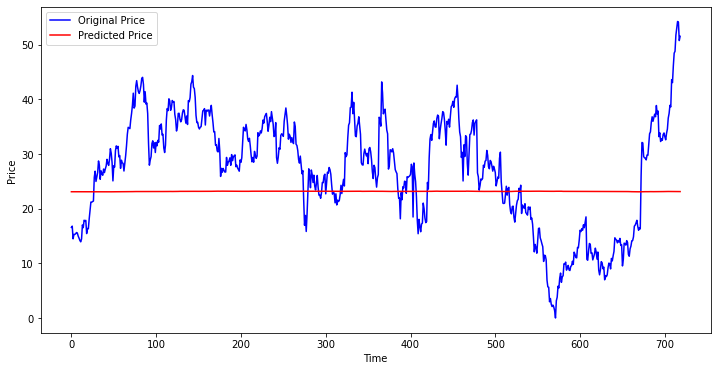

In [137]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
